In [ ]:
1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [ ]:
# importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# reading file

In [3]:
df=pd.read_csv('SalaryData_Train(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# eda

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['workclass']=label_encoder.fit_transform(df['workclass'])
df['education']=label_encoder.fit_transform(df['education'])
df['maritalstatus']=label_encoder.fit_transform(df['maritalstatus'])
df['occupation']=label_encoder.fit_transform(df['occupation'])
df['relationship']=label_encoder.fit_transform(df['relationship'])
df['race']=label_encoder.fit_transform(df['race'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [7]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,United-States,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,United-States,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,United-States,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,United-States,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,United-States,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,United-States,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,United-States,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,United-States,<=50K


In [8]:
df['Salary'] = label_encoder.fit_transform(df['Salary'])
df['native'] = label_encoder.fit_transform(df['native'])


In [9]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [10]:
# Splitting the data into x and y as input and output

X = df.iloc[:,0:13]
Y = df.iloc[:,13]

In [11]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [12]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [13]:
df.Salary.unique()


array([0, 1])

In [14]:
df.Salary.value_counts()


0    22653
1     7508
Name: Salary, dtype: int64

In [15]:
pd.crosstab(df['occupation'],df['Salary'])


Salary,0,1
occupation,,
0,3223,498
1,8,1
2,3122,908
3,2055,1937
4,874,115
5,1267,83
6,1720,245
7,3080,132
8,142,1


In [16]:
pd.crosstab(df['workclass'],df['Salary'])


Salary,0,1
workclass,,
0,578,365
1,1458,609
2,17409,4876
3,474,600
4,1785,714
5,935,344
6,14,0


In [17]:
pd.crosstab(df['workclass'],df['occupation'])


occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13
workclass,,,,,,,,,,,,,,
0,316,9,63,179,8,22,14,34,0,167,27,14,66,24
1,281,0,143,212,29,46,11,189,0,692,304,7,38,115
2,2793,0,3146,2647,450,1255,1881,2665,143,2254,186,2895,723,1247
3,28,0,99,385,51,2,10,27,0,157,5,281,3,26
4,49,0,523,383,430,15,35,173,0,365,6,376,26,118
5,251,0,55,186,15,9,13,123,0,403,116,11,56,41
6,3,0,1,0,6,1,1,1,0,0,0,0,0,1


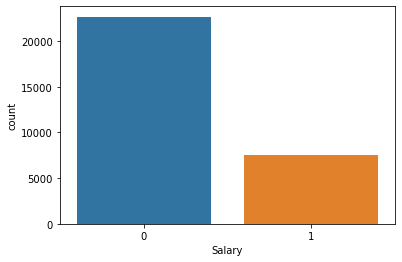

0    22653
1     7508
Name: Salary, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Salary',data= df)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
df['Salary'].value_counts()

C:\Users\berri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

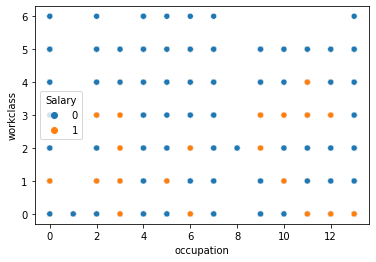

In [19]:
sns.scatterplot(df['occupation'],df['workclass'],hue= df['Salary'])


<AxesSubplot:xlabel='education'>

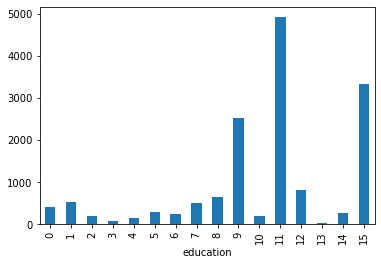

In [20]:
pd.crosstab(df['Salary'],df['education']).mean().plot(kind='bar')


<AxesSubplot:xlabel='occupation'>

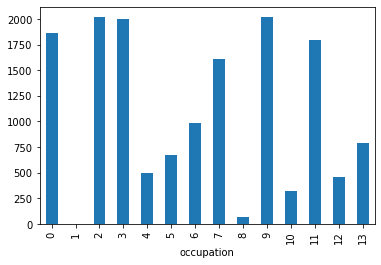

In [21]:
pd.crosstab(df['Salary'],df['occupation']).mean().plot(kind='bar')


<AxesSubplot:xlabel='workclass'>

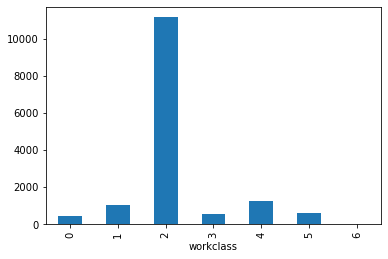

In [22]:
pd.crosstab(df['Salary'],df['workclass']).mean().plot(kind='bar')


<AxesSubplot:xlabel='sex'>

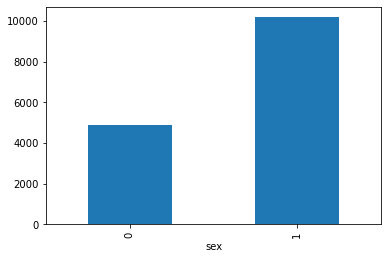

In [23]:
pd.crosstab(df['Salary'],df['sex']).mean().plot(kind='bar')


<AxesSubplot:xlabel='relationship'>

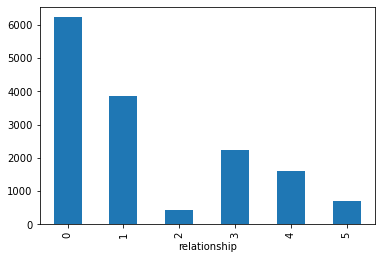

In [24]:
pd.crosstab(df['Salary'],df['relationship']).mean().plot(kind='bar')


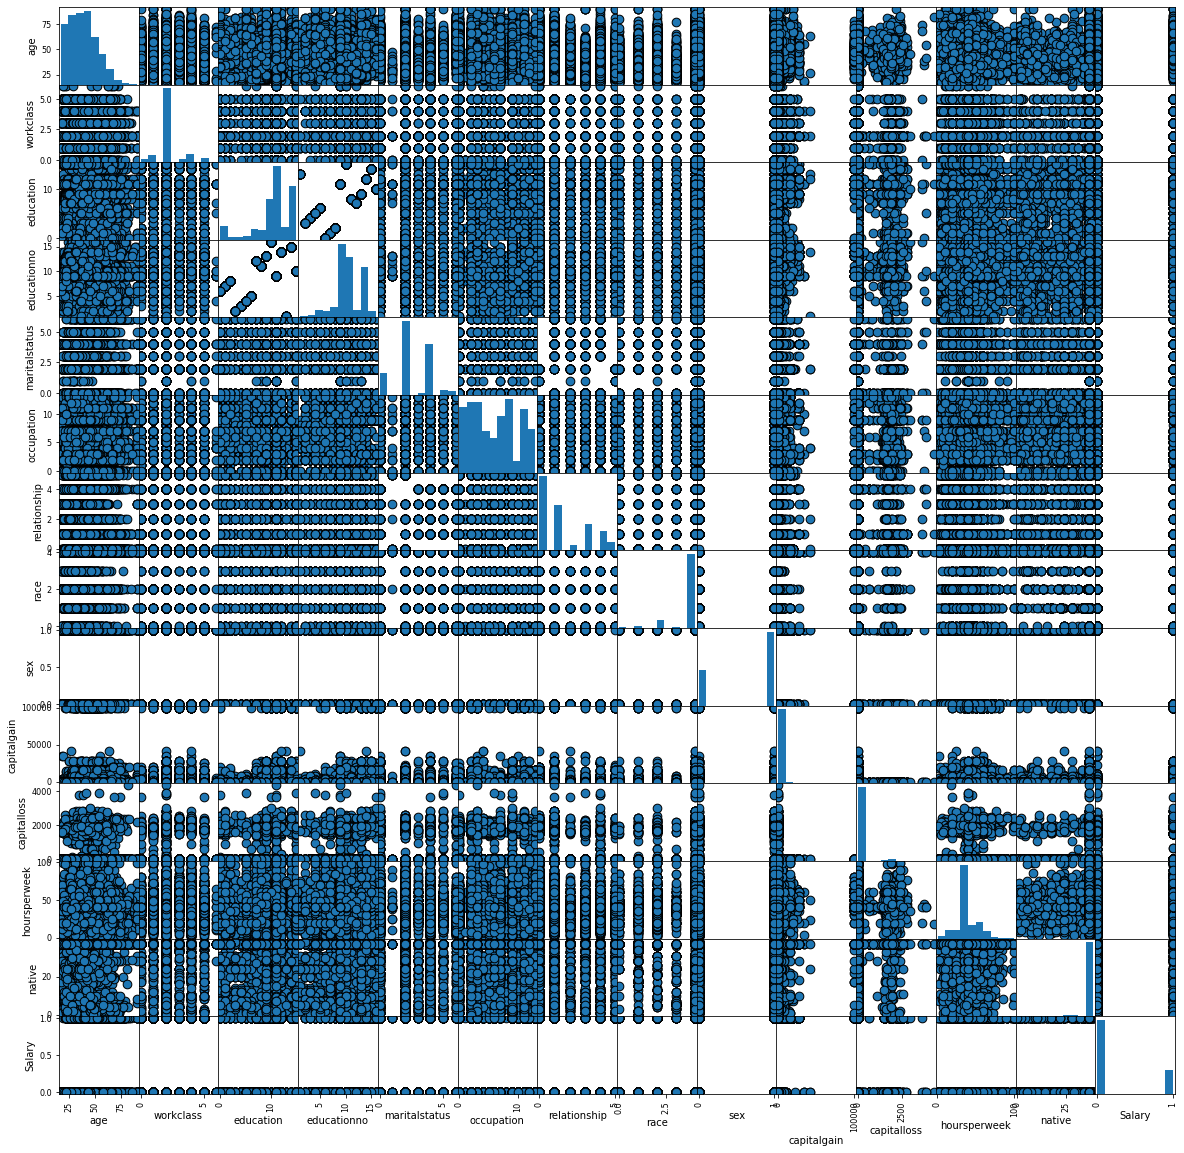

In [25]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(df,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


In [26]:

# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [27]:
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.23527461597966


array([[6580,  218],
       [1661,  590]], dtype=int64)

In [28]:
y_pred=clf.predict(x_test)


In [29]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# FOR TRAINING DATA

In [31]:
df2 = pd.read_csv("SalaryData_Train(1).csv")

In [32]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [34]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df2['workclass']=label_encoder.fit_transform(df2['workclass'])
df2['education']=label_encoder.fit_transform(df2['education'])
df2['maritalstatus']=label_encoder.fit_transform(df2['maritalstatus'])
df2['occupation']=label_encoder.fit_transform(df2['occupation'])
df2['relationship']=label_encoder.fit_transform(df2['relationship'])
df2['race']=label_encoder.fit_transform(df2['race'])
df2['sex']=label_encoder.fit_transform(df2['sex'])
df2['native']=label_encoder.fit_transform(df2['native'])
df2['Salary']=label_encoder.fit_transform(df2['Salary'])

In [35]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [36]:
# Splitting the data into x and y as input and output

x = df.iloc[:,0:13]
y = df.iloc[:,13]

In [37]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [39]:
df2.Salary.unique()


array([0, 1])

In [40]:
df2.Salary.value_counts()


0    22653
1     7508
Name: Salary, dtype: int64

In [41]:
pd.crosstab(df2['occupation'],df2['Salary'])


Salary,0,1
occupation,,
0,3223,498
1,8,1
2,3122,908
3,2055,1937
4,874,115
5,1267,83
6,1720,245
7,3080,132
8,142,1


In [42]:
pd.crosstab(df2['workclass'],df2['Salary'])


Salary,0,1
workclass,,
0,578,365
1,1458,609
2,17409,4876
3,474,600
4,1785,714
5,935,344
6,14,0


In [43]:
pd.crosstab(df2['workclass'],df2['occupation'])


occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13
workclass,,,,,,,,,,,,,,
0,316,9,63,179,8,22,14,34,0,167,27,14,66,24
1,281,0,143,212,29,46,11,189,0,692,304,7,38,115
2,2793,0,3146,2647,450,1255,1881,2665,143,2254,186,2895,723,1247
3,28,0,99,385,51,2,10,27,0,157,5,281,3,26
4,49,0,523,383,430,15,35,173,0,365,6,376,26,118
5,251,0,55,186,15,9,13,123,0,403,116,11,56,41
6,3,0,1,0,6,1,1,1,0,0,0,0,0,1


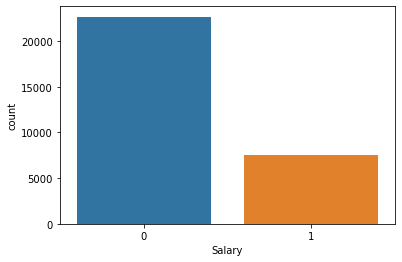

0    22653
1     7508
Name: Salary, dtype: int64

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Salary',data= df2)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
df2['Salary'].value_counts()

C:\Users\berri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

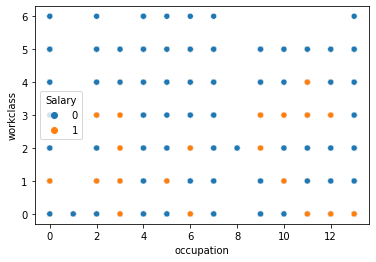

In [45]:
sns.scatterplot(df2['occupation'],df2['workclass'],hue= df2['Salary'])


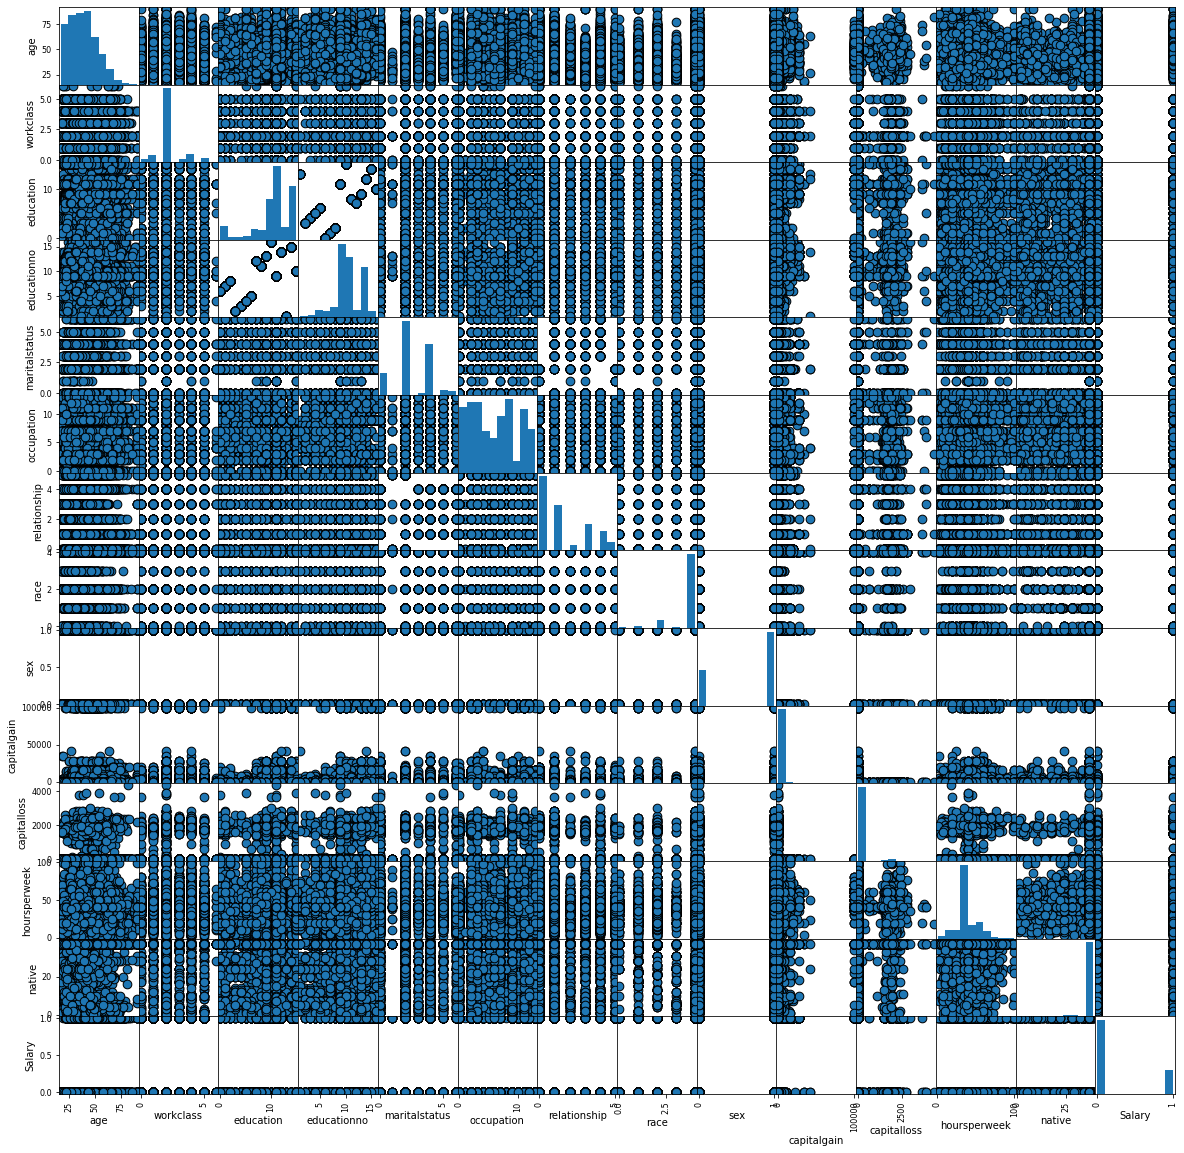

In [46]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(df2,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


In [47]:

# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [48]:
#model building by using SVM
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.23527461597966


array([[6580,  218],
       [1661,  590]], dtype=int64)

In [49]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
#SVM With GridSearch


In [51]:
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [52]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [53]:
gsv.best_params_ , gsv.best_score_


({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.7930559219025882)

In [54]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [55]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 75.57741186871478
